In [3]:
# pip install gradio

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Loading datasets
House = pd.read_csv('/content/housing dataset.csv')
test = pd.read_csv('/content/test.csv')

# Fills missing values
House = House.bfill()
test = test.bfill()

LE = LabelEncoder()
House = House.apply(lambda col: LE.fit_transform(col) if col.dtype == 'O' else col)
test = test.apply(lambda col: LE.fit_transform(col) if col.dtype == 'O' else col)

# Fill missing values again (after label encoding)
House = House.bfill()
test = test.bfill()

Xtrain = House.iloc[:, 1:80]
Ytrain = House.iloc[:, 80:81]
Xtest = test.iloc[:, 1:80]
Xtest2 = test.iloc[:,1:80]

# Standardize features
std = StandardScaler()
Xtrain = std.fit_transform(Xtrain)
Xtest = std.fit_transform(Xtest)


In [6]:
regressor = KNeighborsRegressor(n_neighbors=37, weights='distance', metric='euclidean')
regressor.fit(Xtrain, Ytrain)
ypred = regressor.predict(Xtest)
df1 = pd.DataFrame(test)
df = pd.DataFrame(ypred)
df.rename(columns={0:'SalePrice'},inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Id'}, inplace=True)
df['Id'] = [row['Id'] for _, row in df1.iterrows()]

df.to_csv('Prediction.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


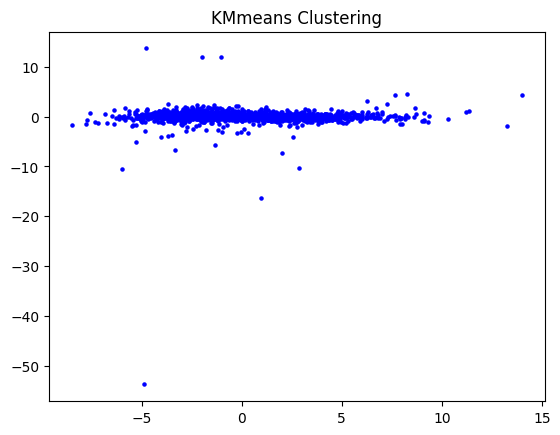

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
y_train_pred = KMeans(n_clusters=37,random_state=0).fit_predict(Xtrain)

lda = LDA(n_components=2)
X_transformed = lda.fit(Xtrain,Ytrain).transform(Xtrain)

plt.scatter(X_transformed[:,0],X_transformed[:,1],c='Blue',s=5)
plt.title('KMmeans Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


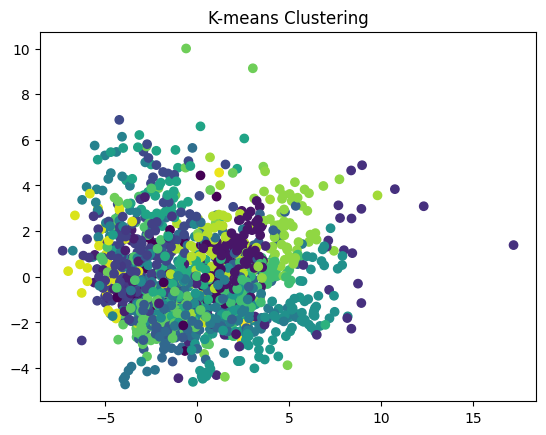

In [8]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=37, random_state=0)
kmeans.fit(Xtrain)

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xtrain)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

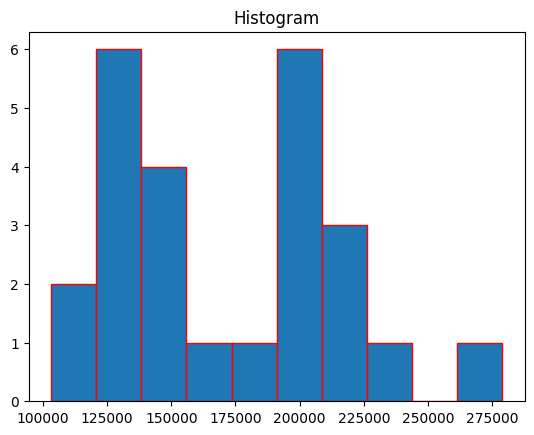

In [9]:
subset_size = 25
subset_data = np.random.choice(ypred.flatten(), size=subset_size, replace=False)

plt.hist(subset_data, bins=10, edgecolor='red')
plt.title('Histogram')
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>],
       [<Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axe

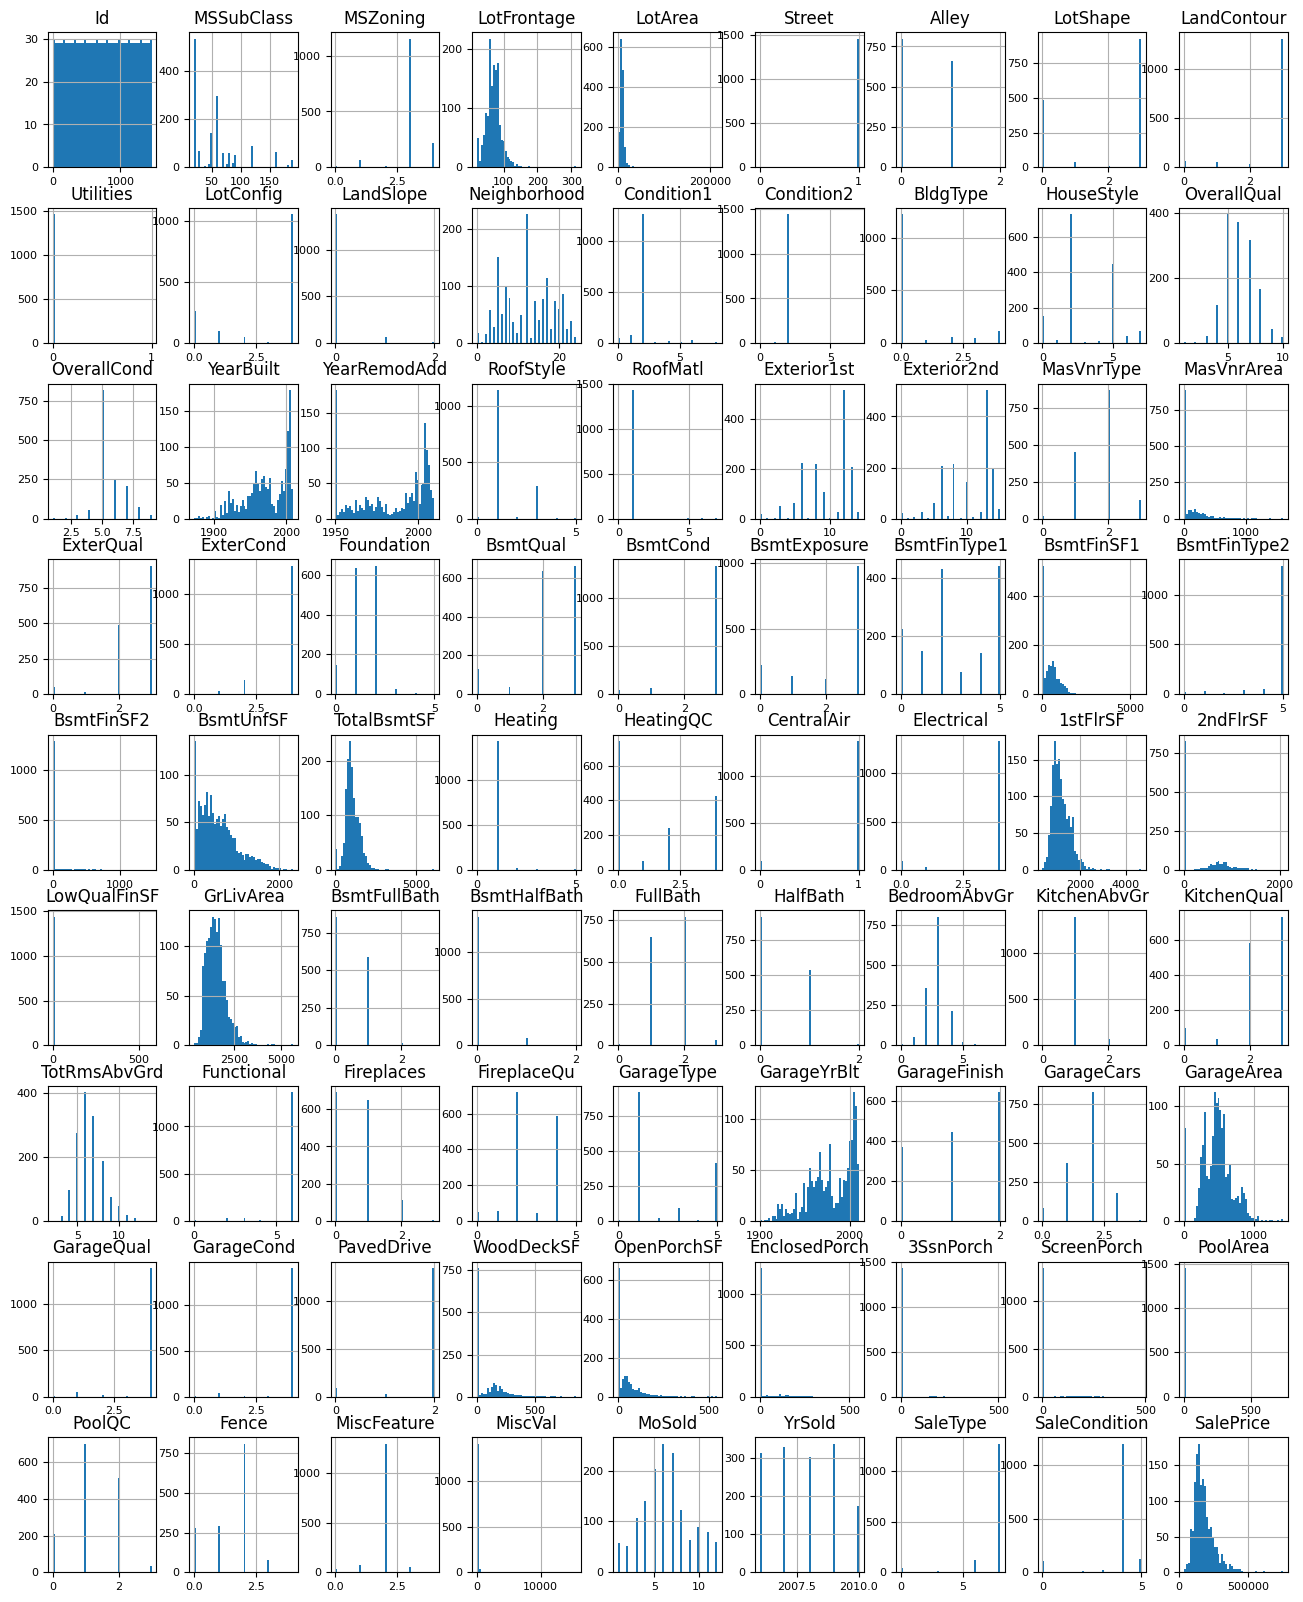

In [10]:
train_num = House.select_dtypes(include = ['float64', 'int64'])
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
# pca = PCA(n_components=1)
# X_pca = pca.fit_transform(Xtest)

# plt.plot(X_pca,ypred)
# plt.title('Line Graph')
# plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


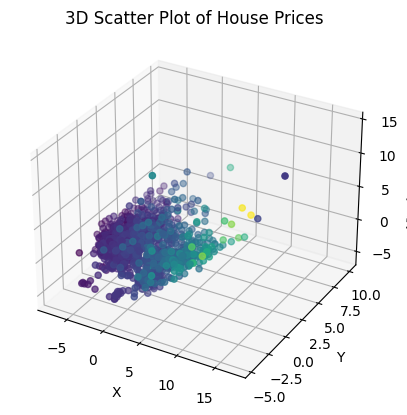

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(Xtrain)
# Scatter plot
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=Ytrain)
# Set labels and title
ax.set_xlabel(X_pca[:,0])
ax.set_ylabel(X_pca[:,1])
ax.set_zlabel(X_pca[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Ytrain values')
# ax.set_xlabel
ax.set_title('3D Scatter Plot of House Prices')

plt.show()

<ipython-input-13-7c779344b877>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

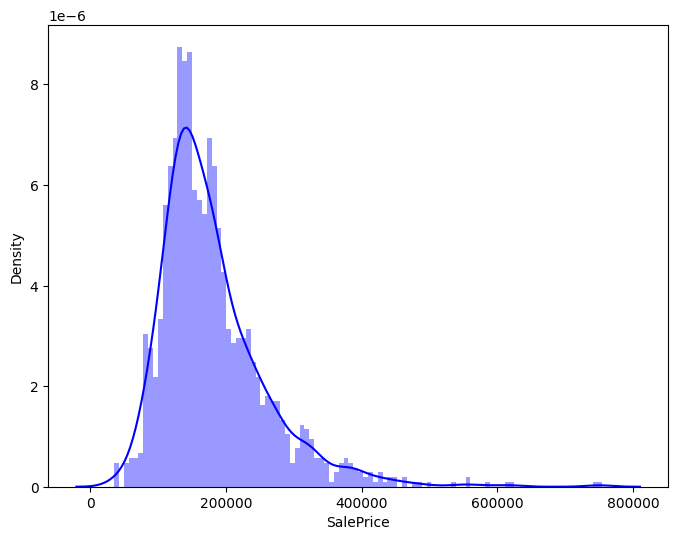

In [13]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(House['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4})

In [14]:
# import lightgbm as lgbm
# lgbm.plot_importance(ypred, max_num_features=30)

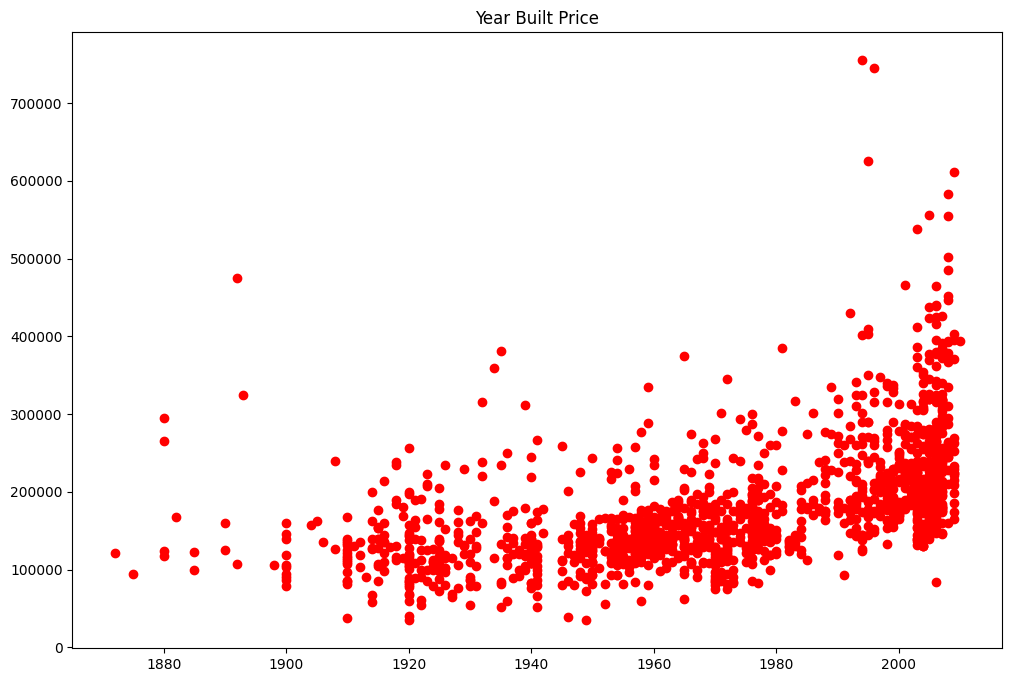

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(House['YearBuilt'],Ytrain,c='red')
plt.title('Year Built Price')
plt.show()

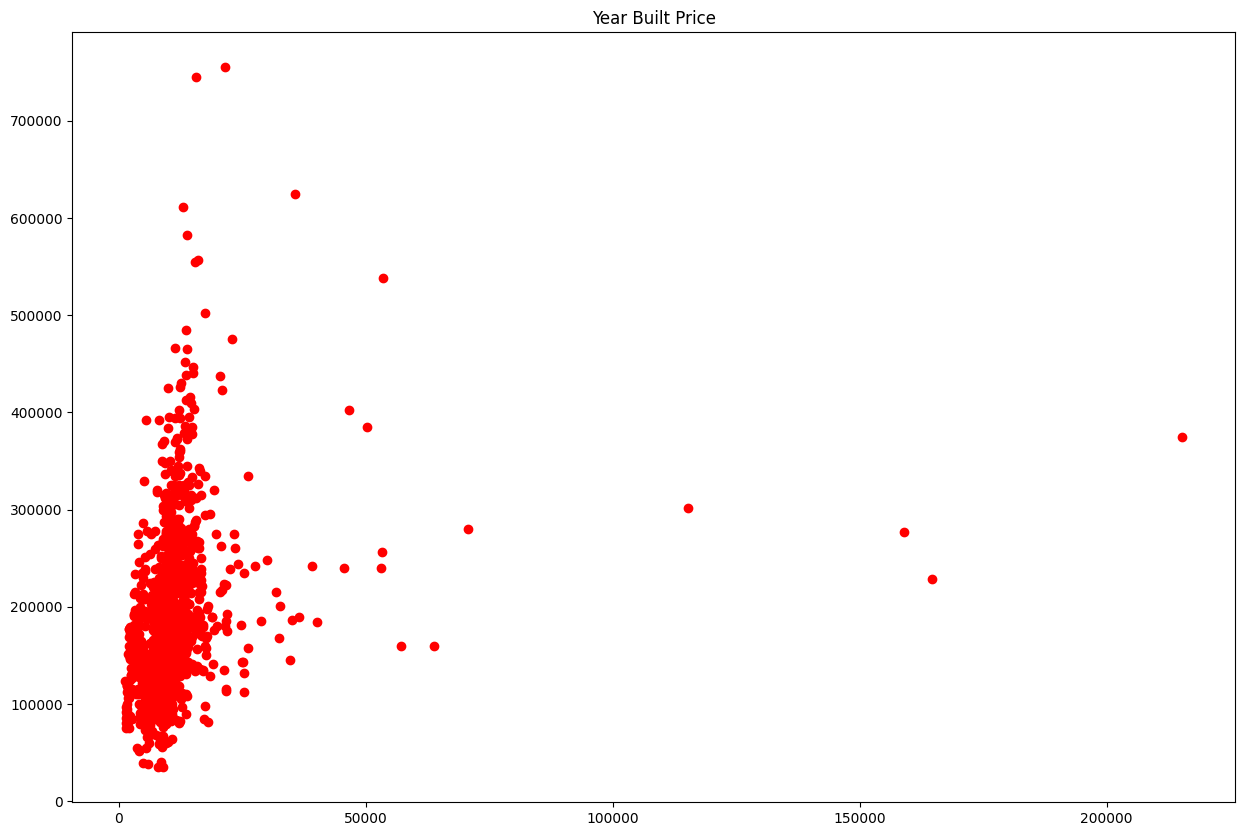

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(House['LotArea'],Ytrain,c='red')
plt.title('Year Built Price')
plt.show()

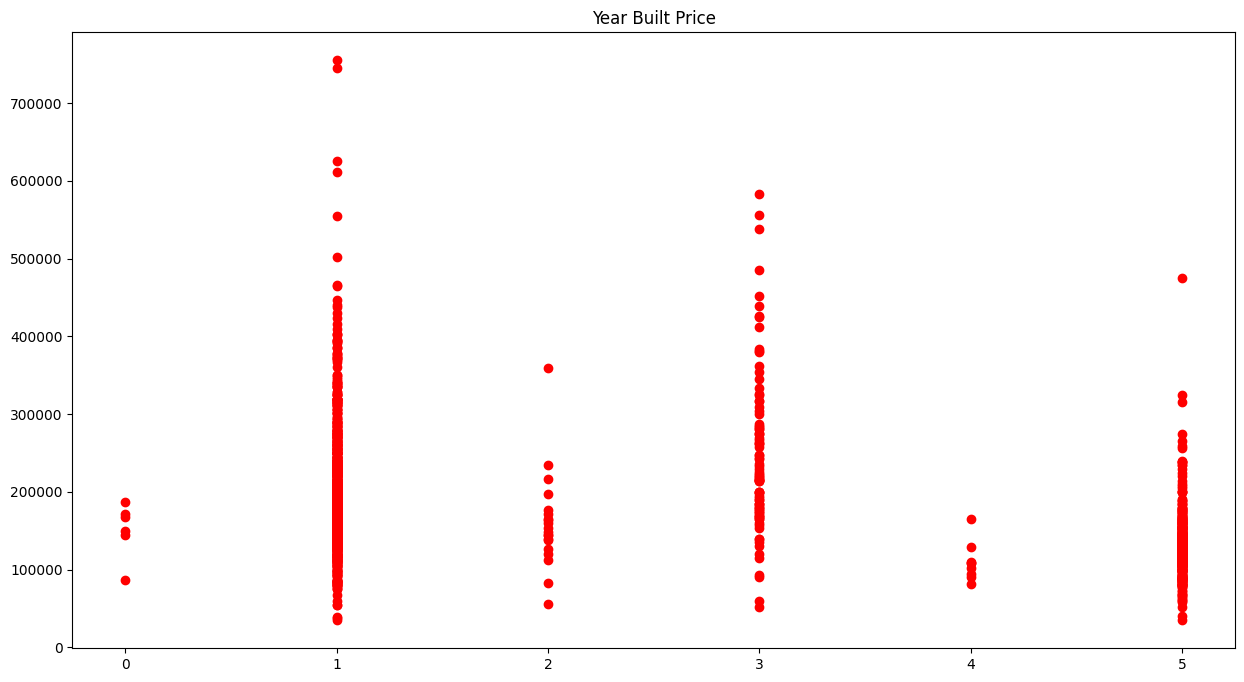

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(House['GarageType'],Ytrain,c='red')
plt.title('Year Built Price')
plt.show()

In [18]:
Xtest2 = np.array(Xtest2)
XtestMean = np.median(Xtest2,axis=0)
XtestMean = XtestMean.reshape(1,79)
print(Xtest2.shape)
print(XtestMean.shape)
print(XtestMean)
# YPRED = prediction(XtestMean)
# print(YPRED)

(1459, 79)
(1, 79)
[[5.000e+01 3.000e+00 6.800e+01 9.399e+03 1.000e+00 1.000e+00 3.000e+00
  3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
  0.000e+00 2.000e+00 6.000e+00 5.000e+00 1.973e+03 1.992e+03 1.000e+00
  0.000e+00 1.000e+01 1.200e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
  1.000e+00 2.000e+00 3.000e+00 3.000e+00 2.000e+00 3.500e+02 5.000e+00
  0.000e+00 4.600e+02 9.880e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
  1.079e+03 0.000e+00 0.000e+00 1.432e+03 0.000e+00 0.000e+00 2.000e+00
  0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 6.000e+00 0.000e+00
  2.000e+00 1.000e+00 1.978e+03 1.000e+00 2.000e+00 4.800e+02 3.000e+00
  4.000e+00 2.000e+00 0.000e+00 2.800e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.000e+00 2.000e+00 0.000e+00 6.000e+00 2.008e+03
  8.000e+00 4.000e+00]]


In [34]:
def prediction(YearBuilt,YearRemodAdd,BsmtUnSF,GarageYrBlt,GarageArea):
    value = XtestMean
    value[0][18] = int(YearBuilt)
    value[0][19] = int(YearRemodAdd)
    value[0][36] = int(BsmtUnSF)
    value[0][58] = int(GarageYrBlt)
    value[0][61] = int(GarageArea)
    value = np.array(value)
    std = StandardScaler()
    value = std.fit_transform(value)
    # print(value.shape)
    # value = np.reshape(1,-1)
    # value = value.reshape((79,1))
    ypred = regressor.predict(value)
    # return f"{YearBuilt}, {GarageArea}"
    # print(ypred.item())
    return f"Predicted Value of House is {ypred.item()}"
# prediction(2003,2003,150,2003,600)

In [23]:
def pred(i1,i2,i3,i4,i5):
  return f"sum is {i1+i2+i3+i4+i5}"

In [35]:
import gradio as gr

# input_components = [
#     gr.Textbox(type="number", label="YearBuilt"),
#     gr.Textbox(type="number", label="YearRemodAdd"),
#     gr.Textbox(type="number", label="BsmtUnSF"),
#     gr.Textbox(type="number", label="GarageYrBuilt"),
#     gr.Textbox(type="number", label="GarageArea"),
# ]

iface = gr.Interface(fn=prediction, inputs=["textbox","textbox","textbox","textbox","textbox"], outputs=["text"])
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ee171713b172cd8f9a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
